In [1]:
import pandas as pd
import league_data_fetcher
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pickle
import json
import requests as rq

In [20]:
with open(r"fpl_obj_league_27964_10_gw.pickle", "rb") as input_file:
    fpl_x = pickle.load(input_file)

In [25]:
fpl_x[7].team_dict[21482].total_points

461

In [3]:
fpl_list = []
for i in range(1,10):
    fpl_list.append(league_data_fetcher.Fetcher(0.01, 27964, i))
#with open(r"fpl_obj_league_62649_gw_6.pickle", "rb") as input_file:
#    fpl = pickle.load(input_file)

Status code: 200
Page #1 saved, sleeping for 0.01 s
Status code: 200
Page #1 saved, sleeping for 0.01 s
Fetching league entries
Status code: 200
Entry #1 saved, sleeping for 0.01 s
Status code: 200
Entry #2 saved, sleeping for 0.01 s
Status code: 200
Entry #3 saved, sleeping for 0.01 s
Status code: 200
Entry #4 saved, sleeping for 0.01 s
Status code: 200
Entry #5 saved, sleeping for 0.01 s
Status code: 200
Entry #6 saved, sleeping for 0.01 s
Status code: 200
Entry #7 saved, sleeping for 0.01 s
Status code: 200
Entry #8 saved, sleeping for 0.01 s
Status code: 200
Entry #9 saved, sleeping for 0.01 s
Status code: 200
Entry #10 saved, sleeping for 0.01 s
Status code: 200
Entry #11 saved, sleeping for 0.01 s
Status code: 200
Entry #12 saved, sleeping for 0.01 s
Status code: 200
Entry #13 saved, sleeping for 0.01 s
Status code: 200
Entry #14 saved, sleeping for 0.01 s
Status code: 200
Entry #15 saved, sleeping for 0.01 s
Status code: 200
Entry #16 saved, sleeping for 0.01 s
Status code: 200


In [4]:
df_list = []

for fpl in fpl_list:
    df_dict = {'team_name': [v.team_name for v in fpl.team_dict.values()],
               'entry': [v.entry for v in fpl.team_dict.values()],
               'country': [v.country for v in fpl.team_dict.values()],
               'gw_points': [v.points for v in fpl.team_dict.values()],
               'total_points': [v.total_points for v in fpl.team_dict.values()],
               'points_on_bench': [v.points_on_bench for v in fpl.team_dict.values()],
               'transfer_cost': [v.event_transfers_cost for v in fpl.team_dict.values()],
               'was_home': [v.aggregate('was_home', 'sum') for v in fpl.team_dict.values()],
               'minutes': [v.aggregate('minutes', 'sum') for v in fpl.team_dict.values()],
               'goals_scored': [v.aggregate('goals_scored', 'sum') for v in fpl.team_dict.values()],
               'assists': [v.aggregate('assists', 'sum') for v in fpl.team_dict.values()],
               'clean_sheets': [v.aggregate('clean_sheets', 'sum') for v in fpl.team_dict.values()],
               'goals_conceded': [v.aggregate('goals_conceded', 'sum') for v in fpl.team_dict.values()],
               'own_goals': [v.aggregate('own_goals', 'sum') for v in fpl.team_dict.values()],
               'penalties_saved': [v.aggregate('penalties_saved', 'sum') for v in fpl.team_dict.values()],
               'penalties_missed': [v.aggregate('penalties_missed', 'sum') for v in fpl.team_dict.values()],
               'yellow_cards': [v.aggregate('yellow_cards', 'sum') for v in fpl.team_dict.values()],
               'red_cards': [v.aggregate('red_cards', 'sum') for v in fpl.team_dict.values()],
               'saves': [v.aggregate('saves', 'sum') for v in fpl.team_dict.values()],
               'bonus': [v.aggregate('bonus', 'sum') for v in fpl.team_dict.values()],
               'bps': [v.aggregate('bps', 'sum') for v in fpl.team_dict.values()],
               'influence': [v.aggregate('influence', 'sum') for v in fpl.team_dict.values()],
               'creativity': [v.aggregate('creativity', 'sum') for v in fpl.team_dict.values()],
               'threat': [v.aggregate('threat', 'sum') for v in fpl.team_dict.values()],
               'ict_index': [v.aggregate('ict_index', 'sum') for v in fpl.team_dict.values()],
               'starts': [v.aggregate('starts', 'sum') for v in fpl.team_dict.values()],
               'expected_goals': [v.aggregate('expected_goals', 'sum') for v in fpl.team_dict.values()],
               'expected_assists': [v.aggregate('expected_assists', 'sum') for v in fpl.team_dict.values()],
               'expected_goal_involvements': [v.aggregate('expected_goal_involvements', 'sum') for v in
                                              fpl.team_dict.values()],
               'expected_goals_conceded': [v.aggregate('expected_goals_conceded', 'sum') for v in
                                           fpl.team_dict.values()],
               'value': [v.aggregate('value', 'sum') for v in fpl.team_dict.values()],
               'xp': [v.aggregate('xp', 'sum') for v in fpl.team_dict.values()],
               'gw': [fpl.gw for v in fpl.team_dict.values()],
               'wrc': [v.aggregate('wrc', 'sum') for v in fpl.team_dict.values()]
               }

    sum_wrl = sum([player.wrl for player in fpl.player_dict.values()])
    
    df_dict['wrl'] = [sum_wrl - v.aggregate('wrl', 'sum') for v in fpl.team_dict.values()]
    df_dict['wrc_ratio'] = list(np.array(df_dict['wrc']) / np.array(df_dict['wrl']))
    
    df_list.append(pd.DataFrame(df_dict))

In [5]:
df = pd.concat(df_list, ignore_index=True)
df['acc_cost'] = df.groupby('entry')['transfer_cost'].cumsum()
df['acc_bench_points'] = df.groupby('entry')['points_on_bench'].cumsum()

In [17]:
df[df['gw'] == 9]

,team_name,entry,country,gw_points,total_points,points_on_bench,transfer_cost,was_home,minutes,goals_scored,...,expected_goal_involvements,expected_goals_conceded,value,xp,gw,wrc,wrl,wrc_ratio,acc_cost,acc_bench_points
379,"Earth,windandmaguire",7818211,Norway,87,589,1,0,10,945,6,...,5.09,10.51,996,69.2,9,50.863830,38.217021,1.330921,0,17
380,greatballsonfire,6419537,Norway,75,588,2,0,11,1135,4,...,3.90,14.94,995,86.9,9,61.070213,30.723404,1.987742,0,61
381,Iniestas mormor,585573,Sweden,89,583,3,0,13,1106,8,...,4.86,11.27,1012,76.2,9,49.459574,29.812766,1.659007,8,36
382,DaviesDynamos,7930723,Sweden,87,564,4,0,12,1238,4,...,4.64,14.85,993,70.3,9,49.980851,36.234043,1.379389,0,33
383,Bearcubs,695036,Sweden,69,562,2,0,7,975,3,...,3.56,12.89,1009,58.5,9,39.138298,37.191489,1.052346,8,39
384,Örjans Vallhundar,6925330,Sweden,92,560,13,0,10,1255,6,...,4.44,14.35,1016,81.0,9,52.751064,28.304255,1.863715,16,55
385,FC Drull,3480198,Norway,90,559,4,0,11,1124,6,...,5.35,12.25,1017,66.1,9,41.076596,31.529787,1.302787,0,55
386,Barf XI,128320,Sweden,80,558,3,0,11,1094,4,...,4.62,11.27,1003,68.0,9,44.236170,32.789362,1.349101,4,60
387,Valverde United,543913,Norway,83,558,5,4,8,1152,7,...,5.66,15.40,1014,68.7,9,45.665957,33.519149,1.362384,4,86
388,FC Misfits United,3186752,Norway,76,554,2,0,9,1150,4,...,4.45,15.07,1000,66.7,9,45.336170,35.189362,1.288349,8,73


/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/ven

<Axes: xlabel='gw', ylabel='total_points'>

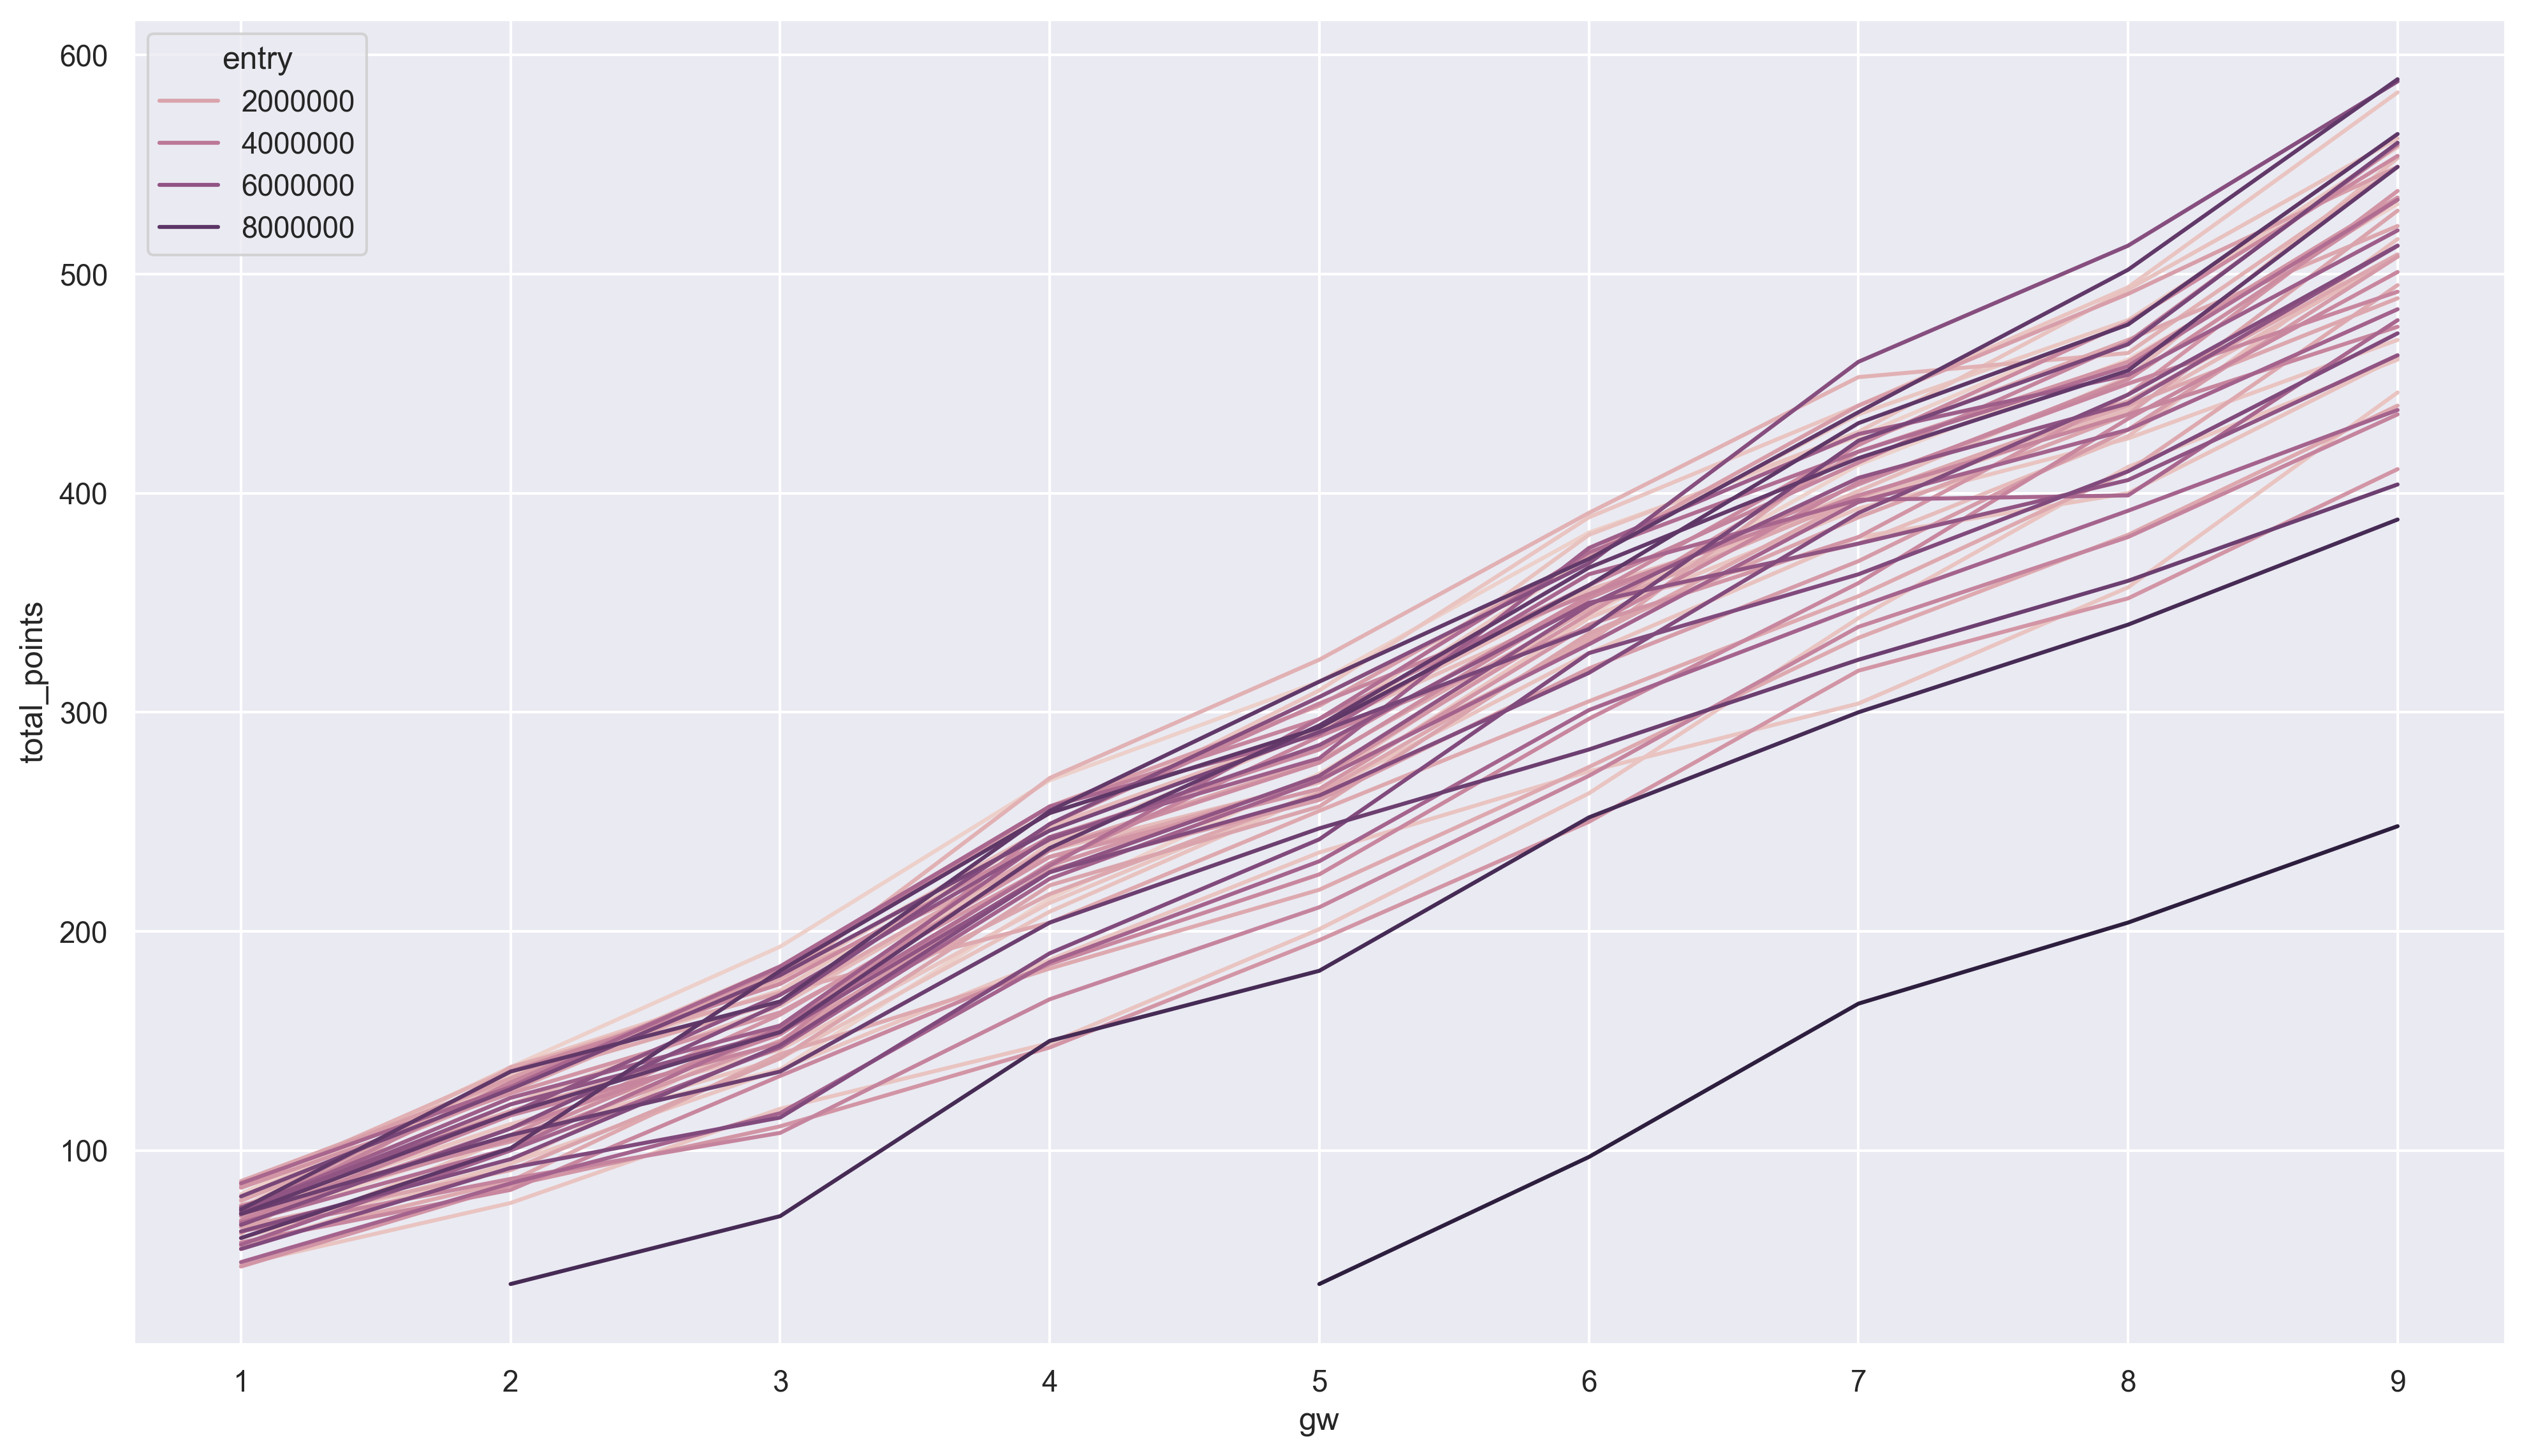

In [16]:
sns.lineplot(data=df, y='total_points', x='gw', hue='entry')

In [18]:
with open('fpl_obj_league_27964_10_gw.pickle', 'wb') as f:
    pickle.dump(fpl_list, f)

In [8]:
df.to_pickle('league_27964_df.pickle')

In [8]:
with open('fpl_obj_league_62649_gw_6.pickle', 'wb') as f:
    pickle.dump(fpl, f)

In [9]:
sns.set(rc={'figure.figsize':(16,9), "figure.dpi":300, 'savefig.dpi':300})

/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipengstrom/Desktop/programmering/fpl_league_ass

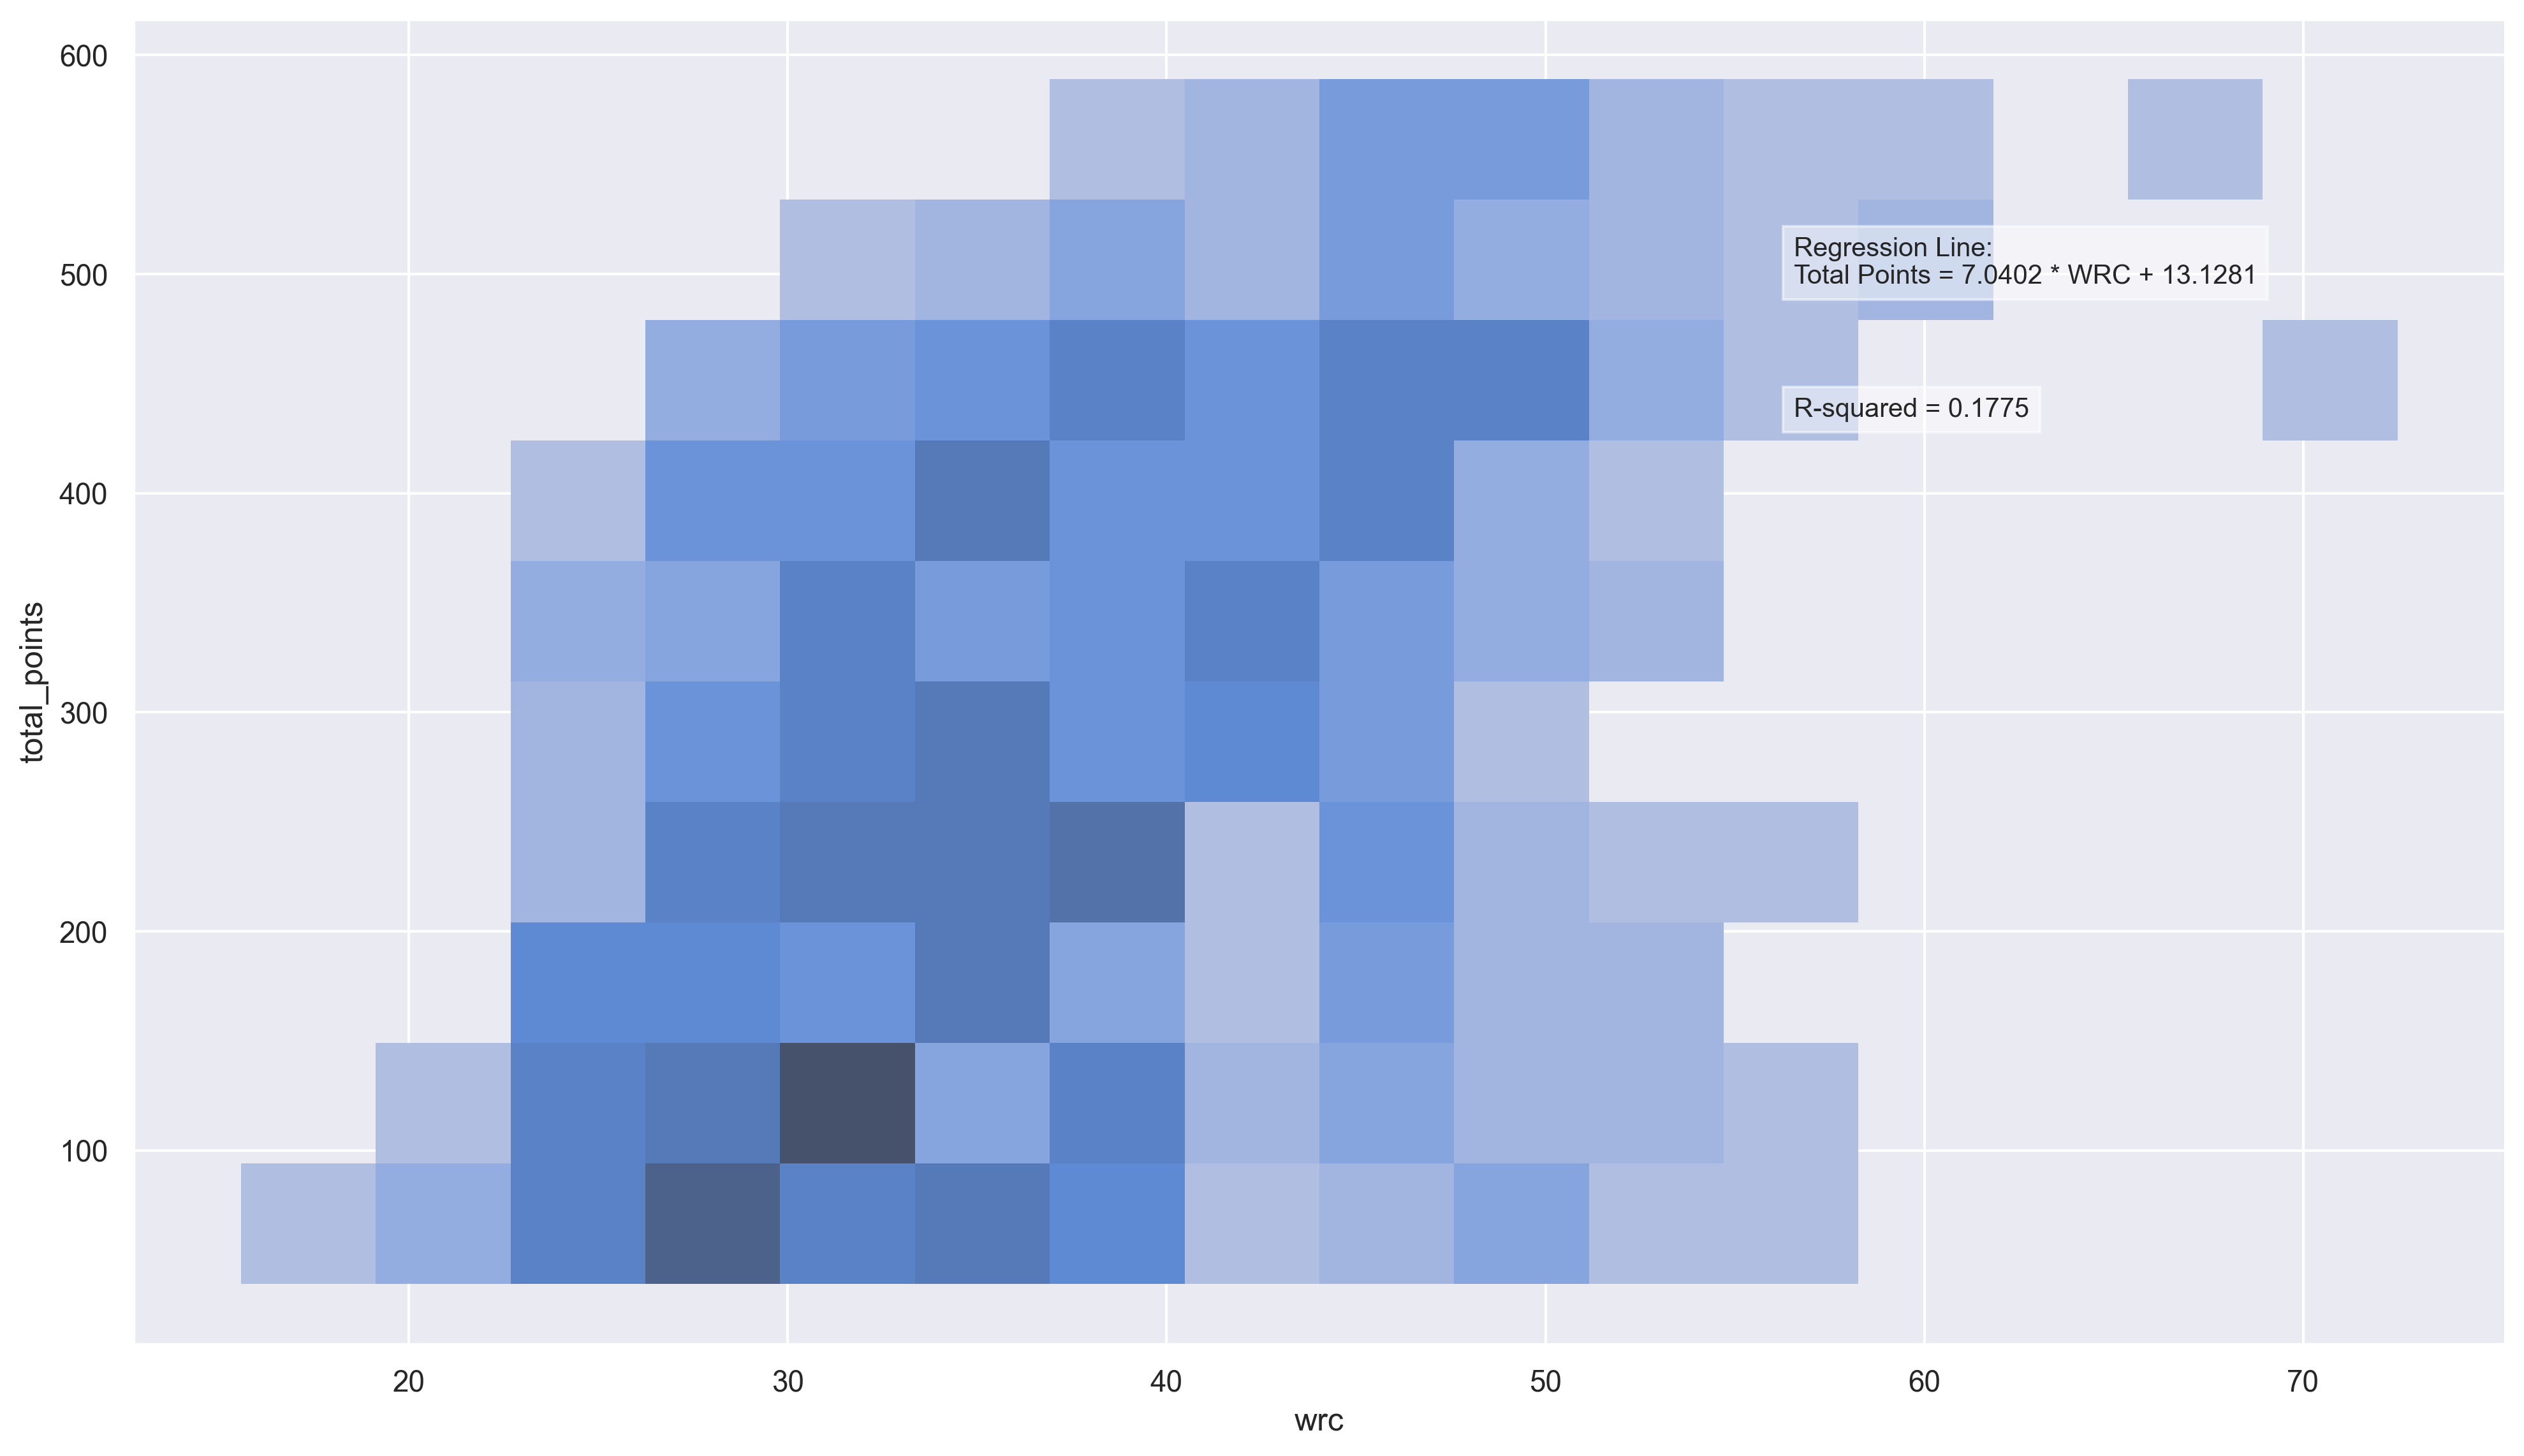

In [10]:
sns.histplot(data=df, x='wrc', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrc'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRC + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipengstrom/Desktop/programmering/fpl_league_ass

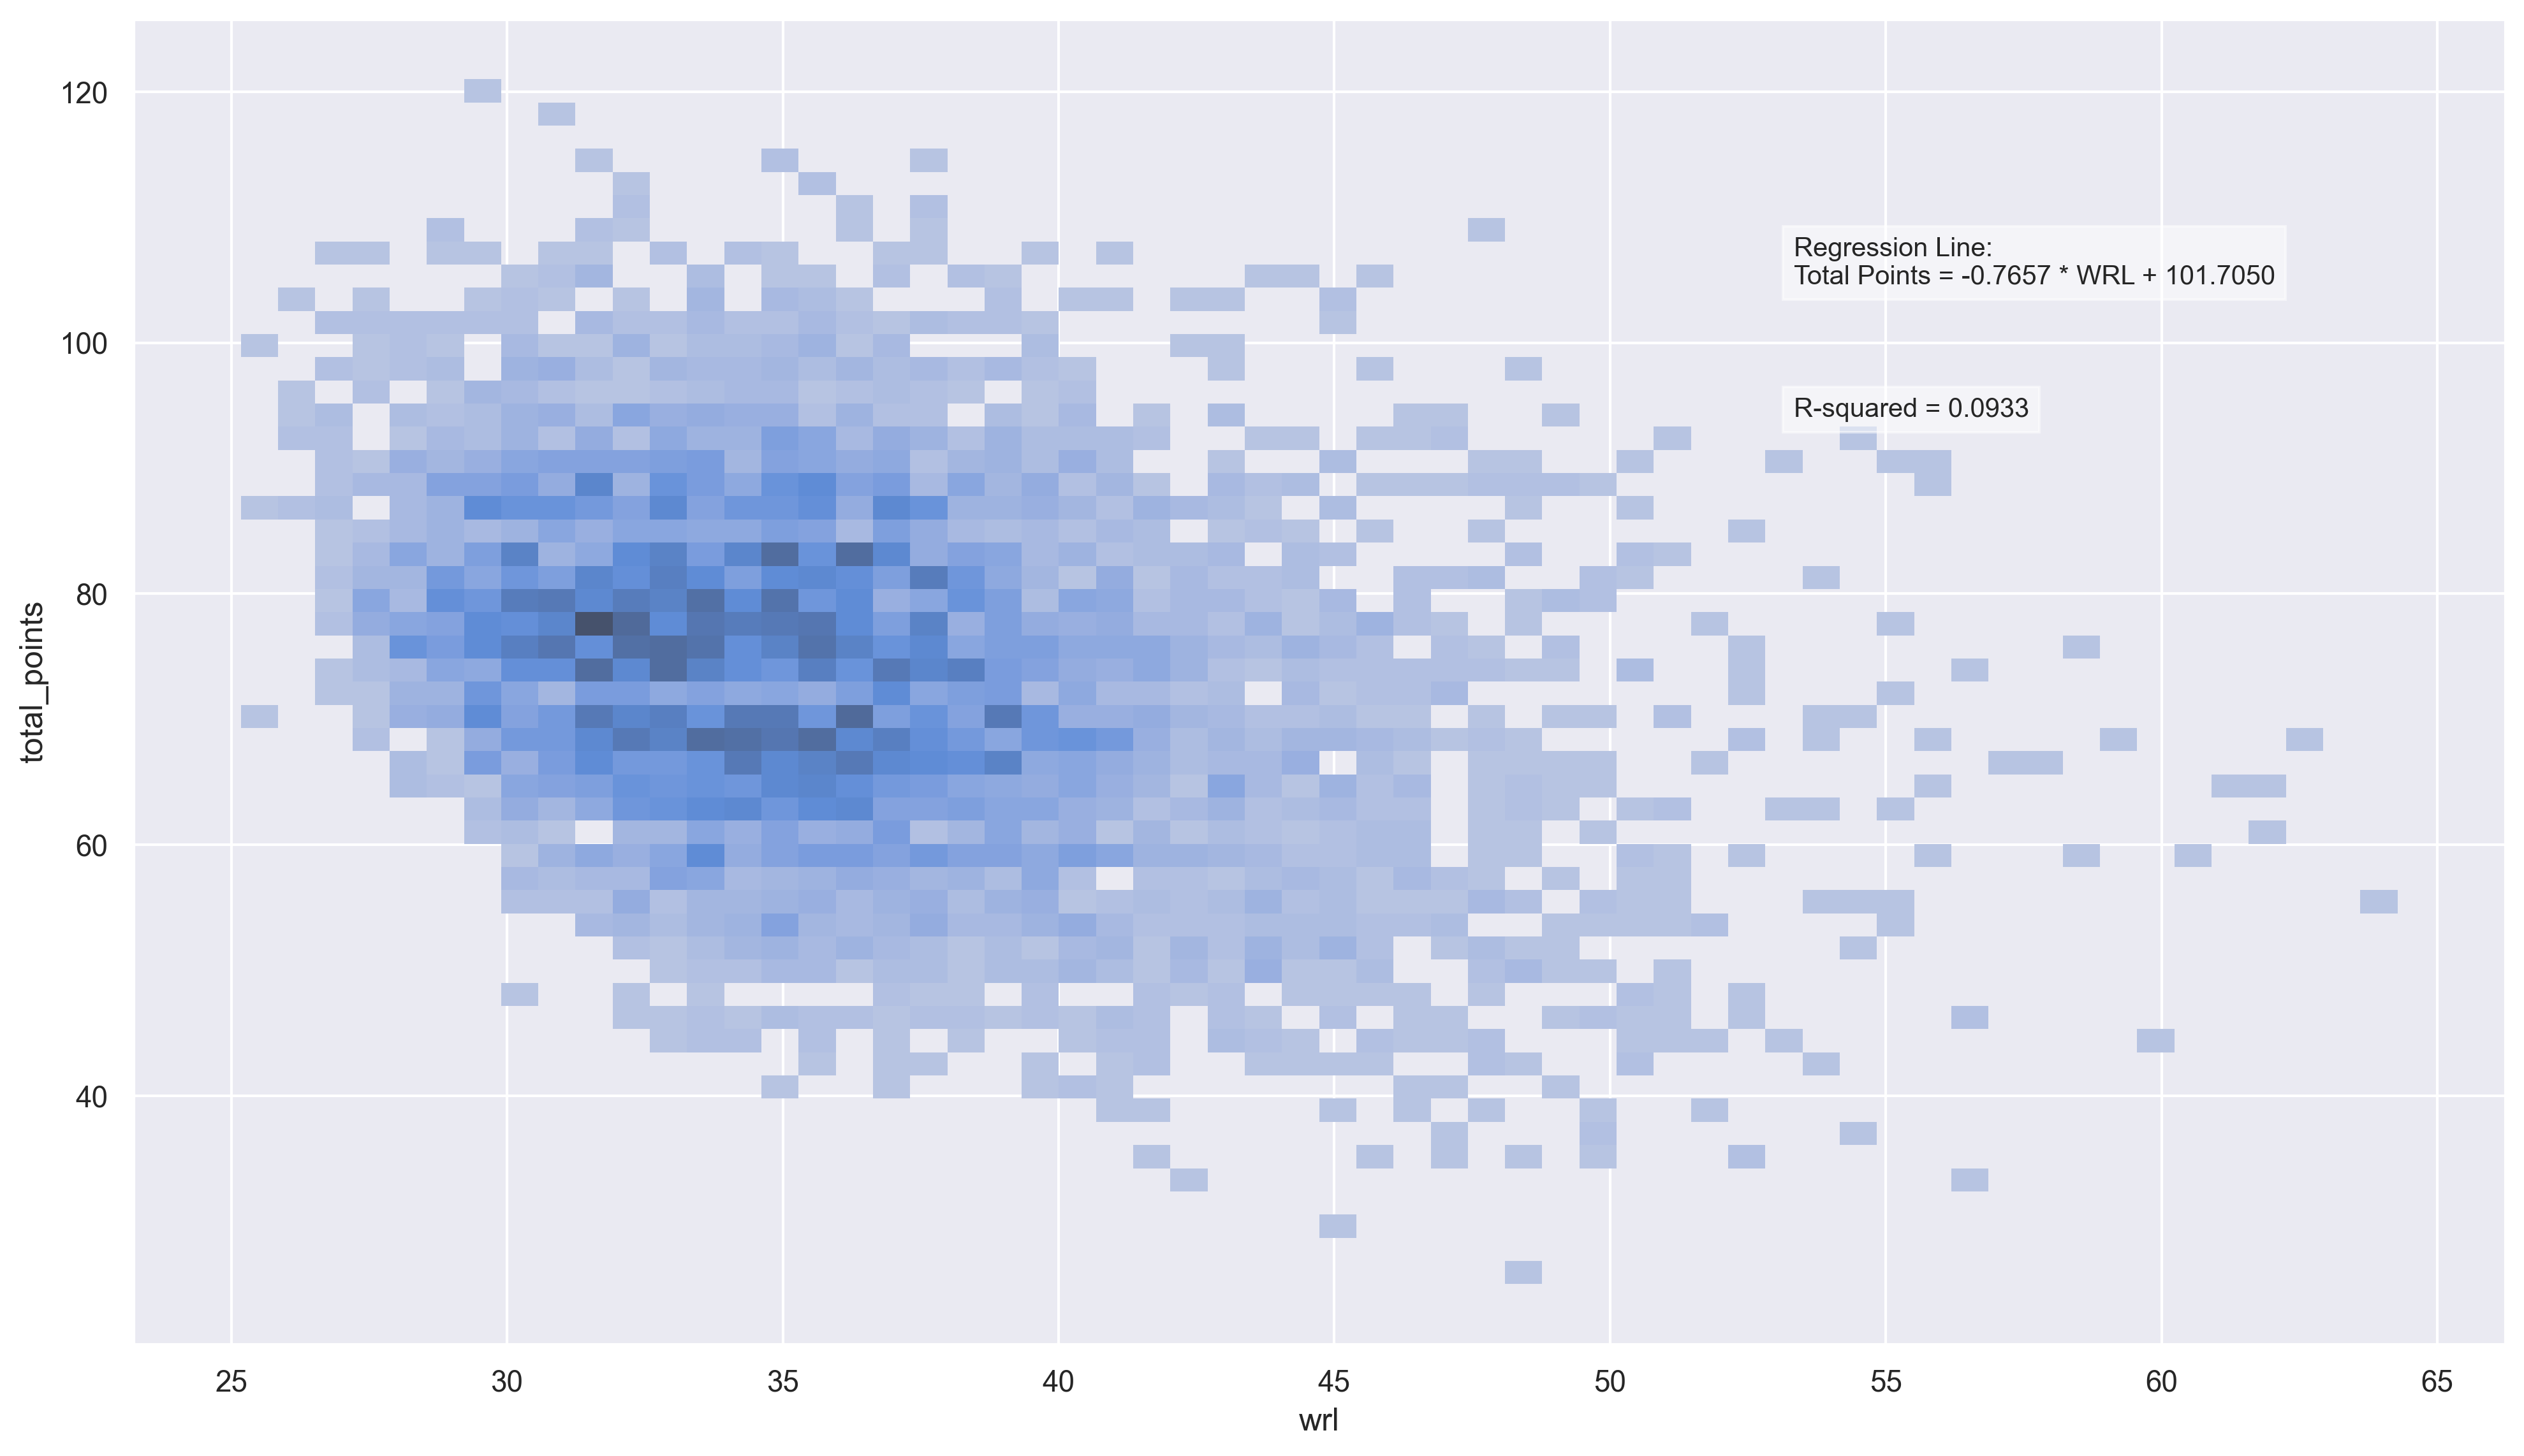

In [11]:
sns.histplot(data=df, x='wrl', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrl'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRL + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipengstrom/Desktop/programmering/fpl_league_ass

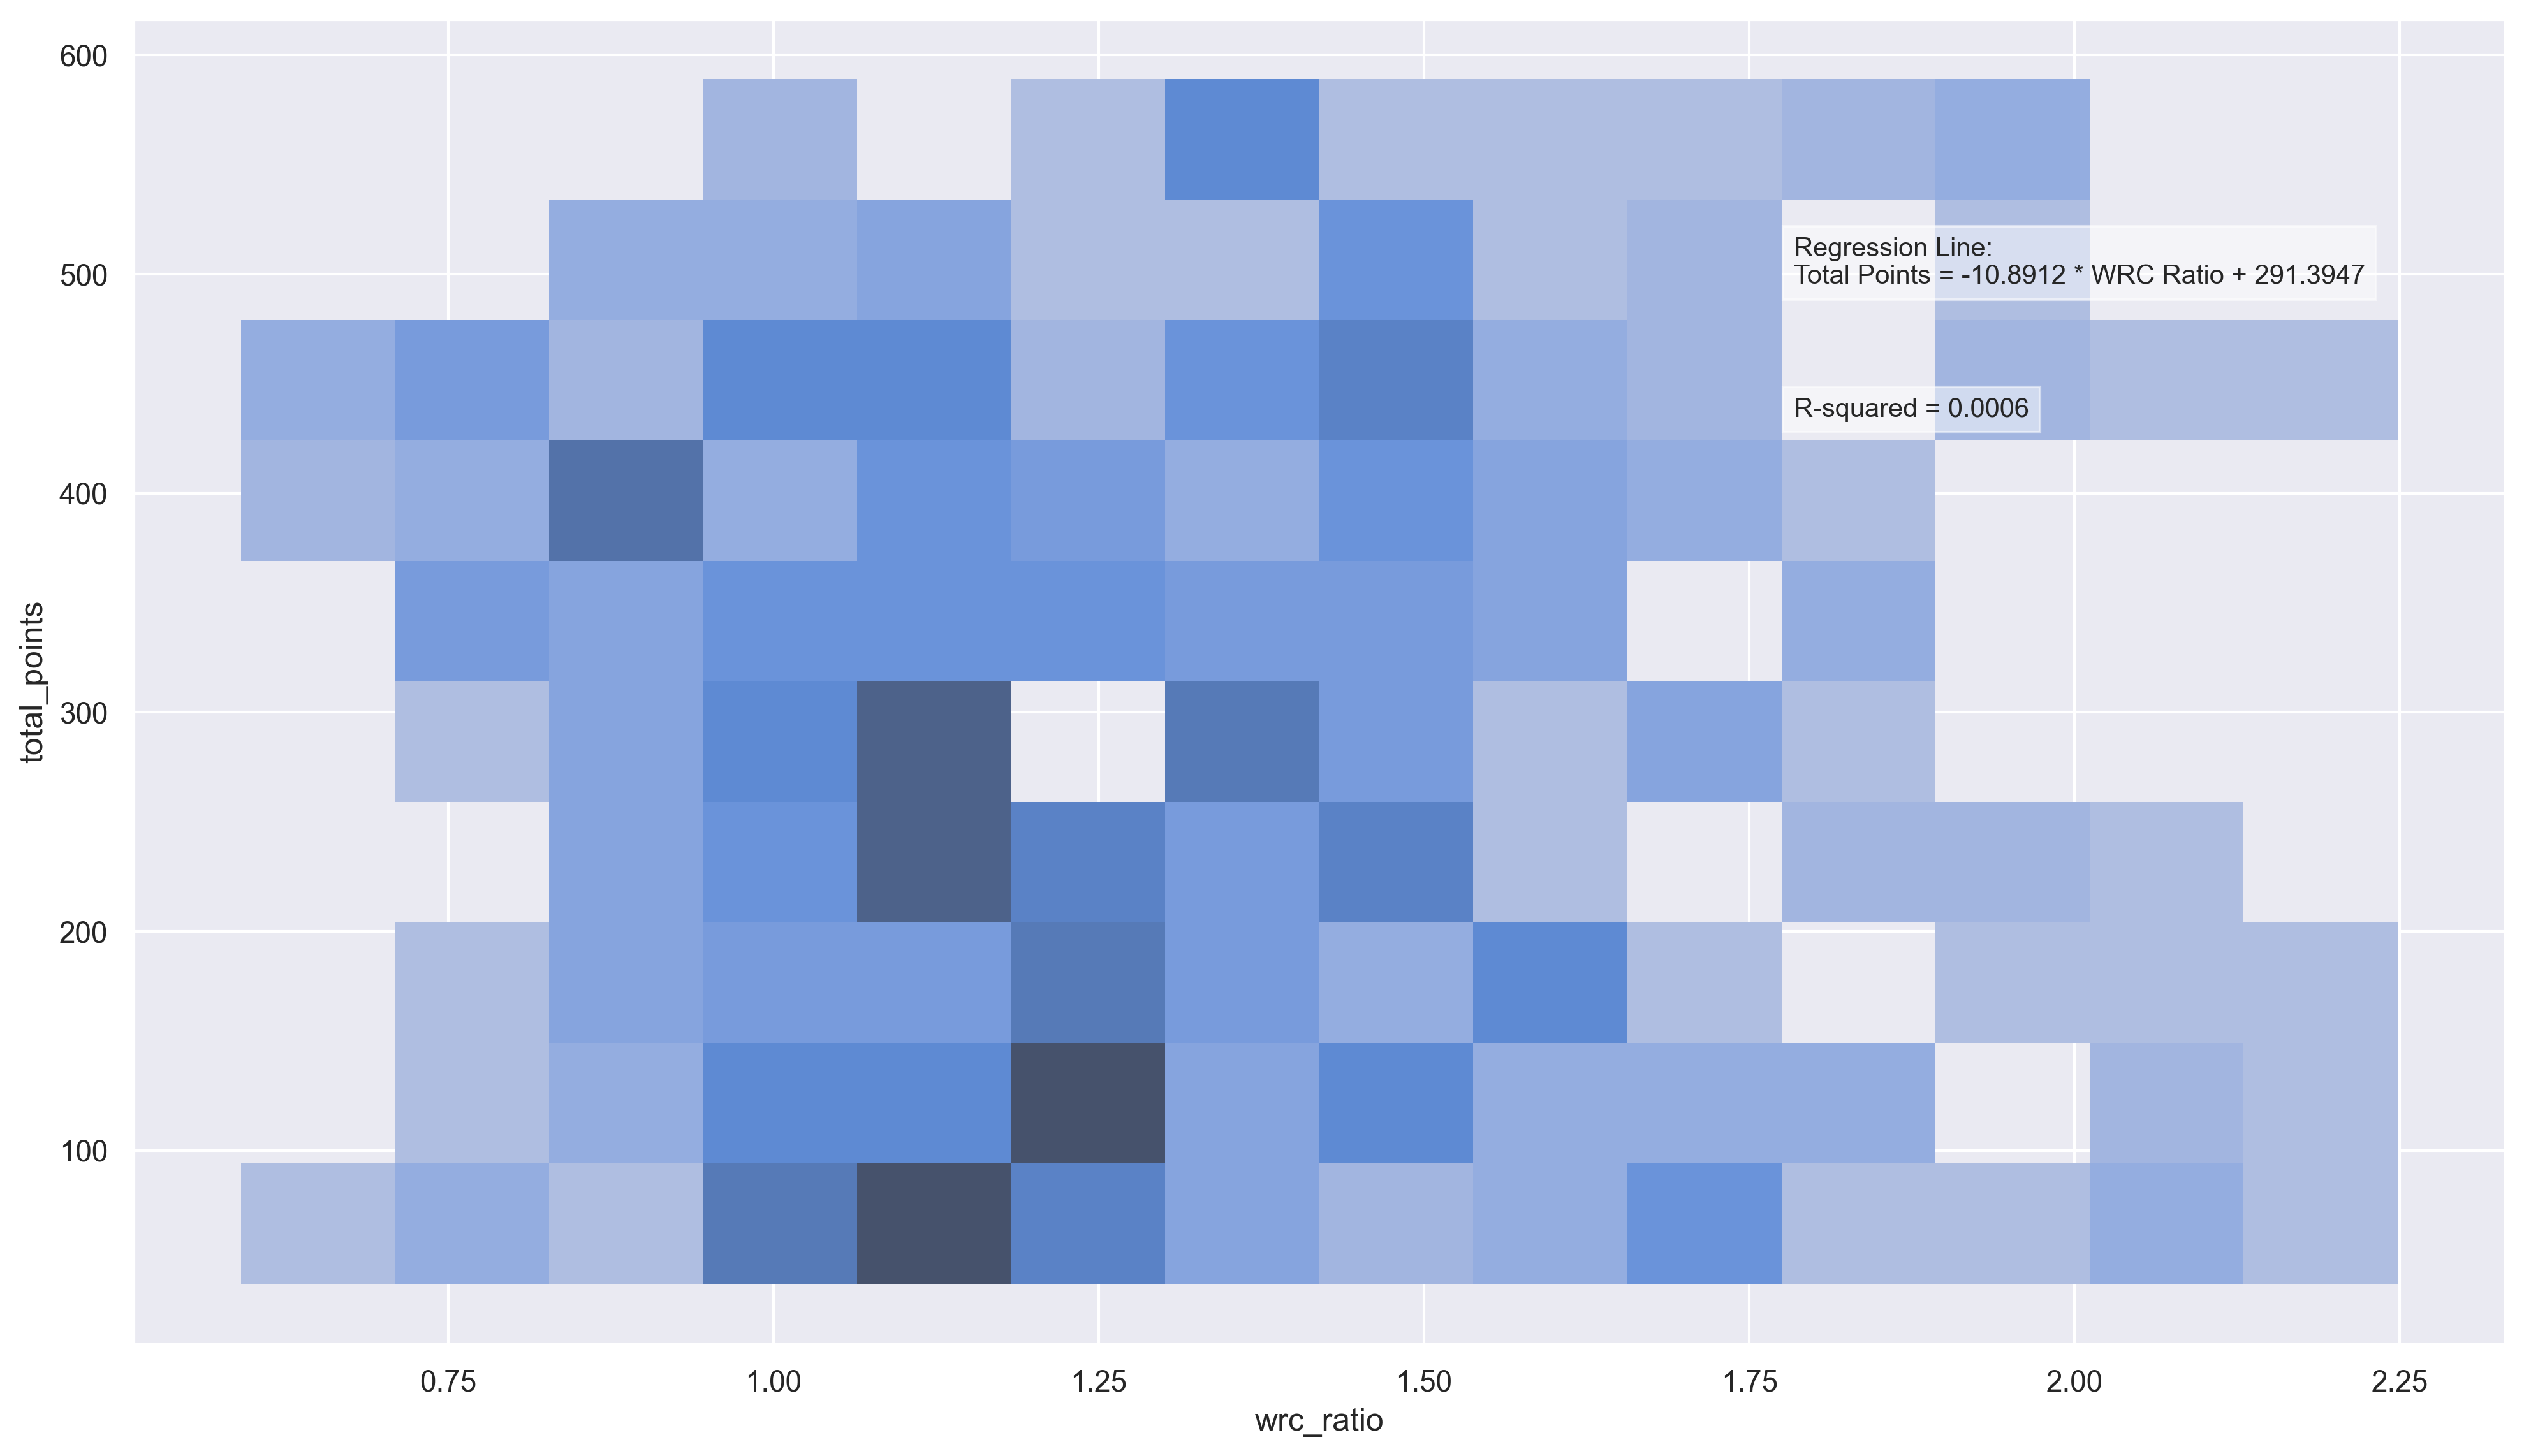

In [11]:
sns.histplot(data=df, x='wrc_ratio', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrc_ratio'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRC Ratio + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipengstrom/Desktop/programmering/fpl_league_ass

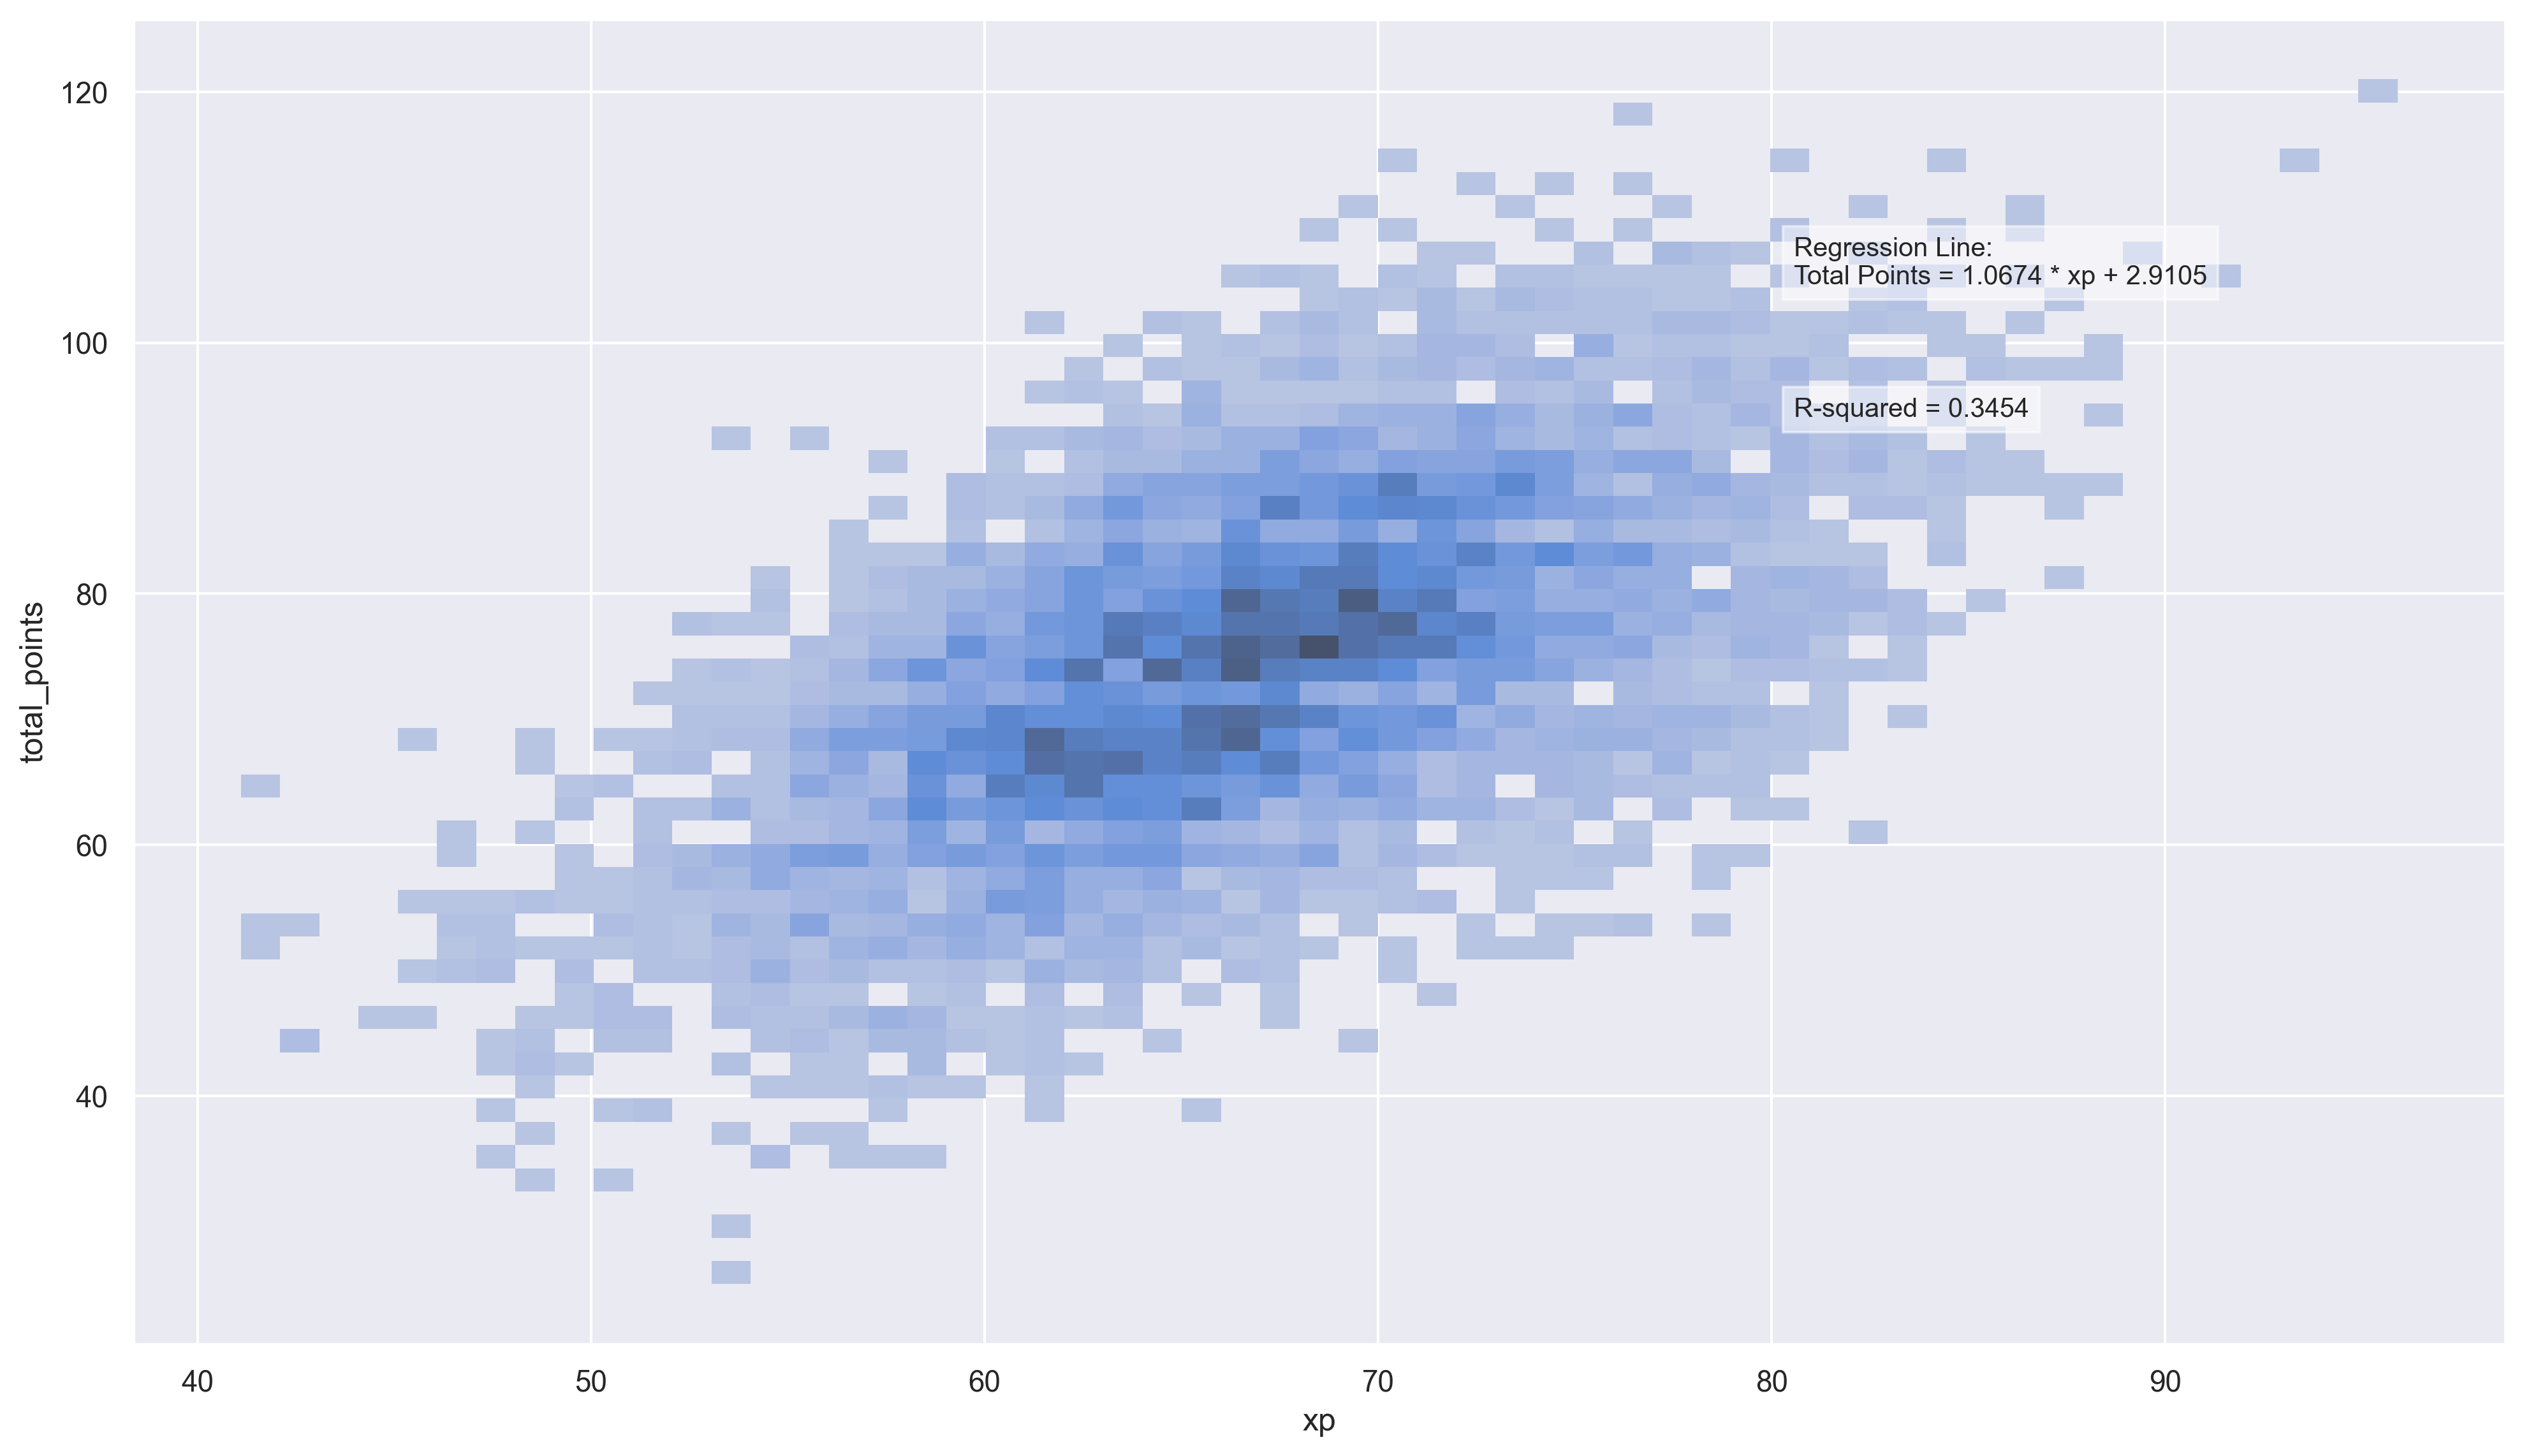

In [13]:
sns.histplot(data=df, x='xp', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['xp'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * xp + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [5]:
df[df['entry'].isin([82846, 15644, 21482])]

,team_name,entry,country,total_points,was_home,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,xp,wrc,wrl,wrc_ratio
536,Pick of Destiny,82846,Sweden,89,9,1297,5,5,6,14,...,15,3.14,1.42,4.56,17.69,1006,74.0,36.967275,29.660330,1.246354
2441,El grande mums!,15644,Sweden,79,9,1224,4,6,5,21,...,14,3.23,1.87,5.10,19.63,1006,71.9,34.259441,29.052496,1.179225
4764,Finnboda Hotspur FC,21482,Sweden,73,8,1212,5,3,6,17,...,14,3.55,0.64,4.19,19.78,1002,73.9,49.885382,42.678436,1.168866


In [26]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
bootstrap: json = rq.get(url).json()

In [29]:
dict_xp = {}
position_dict: dict = {1: 'GOAL', 2: 'DEF', 3: 'MID', 4: 'FWD'}

dict_xp['first_name'] = [player['first_name'] for player in bootstrap['elements']]
dict_xp['second_name'] = [player['second_name'] for player in bootstrap['elements']]
dict_xp['position'] = [position_dict[int(player['element_type'])] for player in bootstrap['elements']]
dict_xp['id'] = [player['id'] for player in bootstrap['elements']]
dict_xp['value'] = [int(player['now_cost']) for player in bootstrap['elements']]
dict_xp['xp'] = [float(player['ep_this']) for player in bootstrap['elements']]
dict_xp['selected'] = [float(player['selected_by_percent']) / 100 for player in bootstrap['elements']]

df_xp = pd.DataFrame(dict_xp)

df_xp['wrc'] = (1 - df_xp['selected']) * df_xp['xp']
df_xp['wrl'] = df_xp['selected'] * df_xp['xp']
df_xp['wrc_ratio'] = df_xp['wrc'] / df_xp['wrl']

df_xp = df_xp[(df_xp['selected'] > 0) & (df_xp['wrc_ratio'] < 30) & (df_xp['position'] == 'MID')].sort_values(by='wrc', ascending=False)
df_xp

,first_name,second_name,position,id,value,xp,selected,wrc,wrl,wrc_ratio
41,Douglas Luiz,Soares de Paulo,MID,43,55,8.3,0.076,7.6692,0.6308,12.157895
380,Mohamed,Salah,MID,308,128,11.2,0.417,6.5296,4.6704,1.398082
12,Martin,Ødegaard,MID,14,85,7.8,0.220,6.0840,1.7160,3.545455
119,Bryan,Mbeumo,MID,108,67,6.5,0.189,5.2715,1.2285,4.291005
27,Declan,Rice,MID,540,54,5.5,0.048,5.2360,0.2640,19.833333
246,Cole,Palmer,MID,362,50,5.4,0.035,5.2110,0.1890,27.571429
656,Son,Heung-min,MID,516,95,8.0,0.367,5.0640,2.9360,1.724796
243,Raheem,Sterling,MID,216,70,5.5,0.084,5.0380,0.4620,10.904762
672,Jarrod,Bowen,MID,526,74,6.3,0.208,4.9896,1.3104,3.807692
516,Anthony,Gordon,MID,412,57,4.8,0.077,4.4304,0.3696,11.987013


In [22]:
fpl.team_dict[21482].player_dict